In [1]:
#data encoded into vectors (dna strands) that are shuffled around
import torch
import torchvision
from torch import nn
import torch.nn.functional as F

from torchvision.utils import save_image
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np

batch_size = 64
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.ToTensor()),
        batch_size = batch_size, shuffle=True)


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

class Net(nn.Module):
    def __init__(self,n_strands,strand_size):
        super(Net, self).__init__()
        self.n_strands = n_strands
        self.strand_size = strand_size
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)
        self.fc4 = nn.Linear(3, 64)
        self.fc5 = nn.Linear(64, 128)
        self.fc6 = nn.Linear(128, 28*28)


    def forward(self, x):
        x = x.view(x.size(0),28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.tanh(self.fc6(x))
        return x

if device != 'cpu':
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
model = Net(3,3).to(device)
#torch.set_default_tensor_type('torch.FloatTensor')

for batch_idx, (data, target) in enumerate(train_loader):
    output = model(data.to(device))
    print(output.shape)
    break

torch.Size([64, 784])


/home/liam/.local/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


/home/liam/.local/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


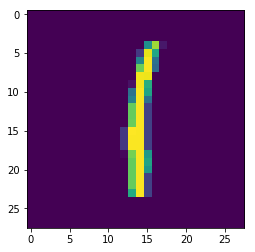

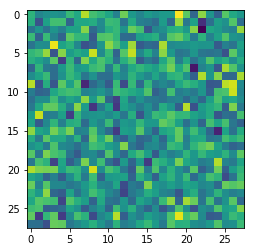

tensor(0.1139, grad_fn=<MseLossBackward>)


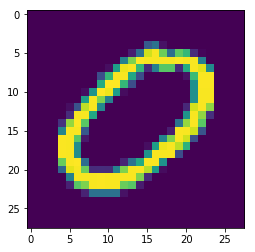

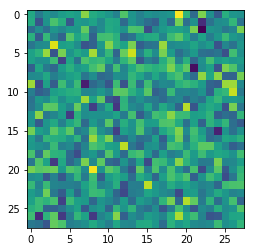

tensor(0.1128, grad_fn=<MseLossBackward>)


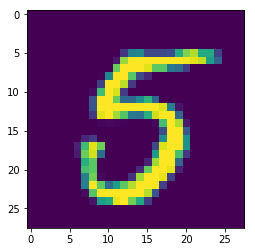

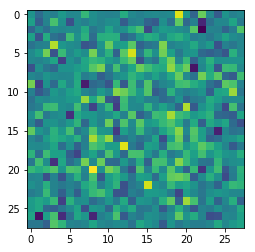

tensor(0.1074, grad_fn=<MseLossBackward>)


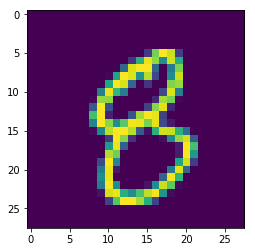

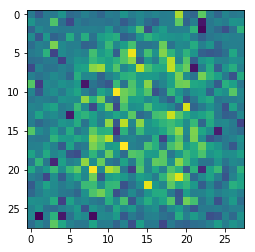

tensor(0.1001, grad_fn=<MseLossBackward>)


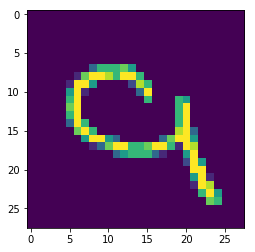

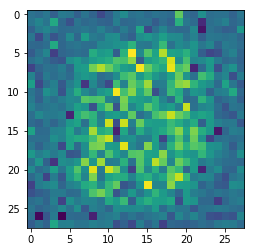

tensor(0.0935, grad_fn=<MseLossBackward>)


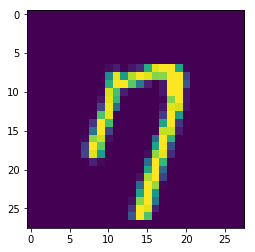

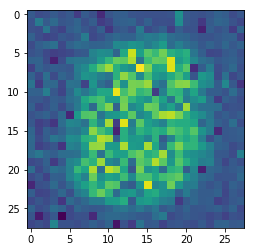

tensor(0.0711, grad_fn=<MseLossBackward>)


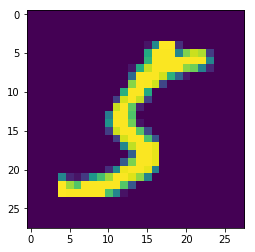

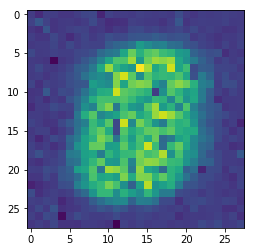

tensor(0.0651, grad_fn=<MseLossBackward>)


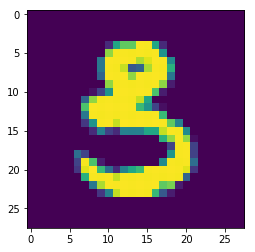

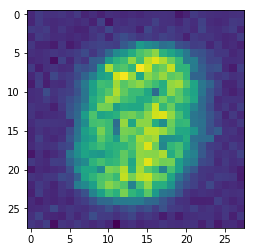

tensor(0.0666, grad_fn=<MseLossBackward>)


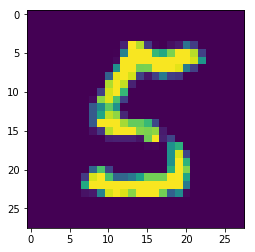

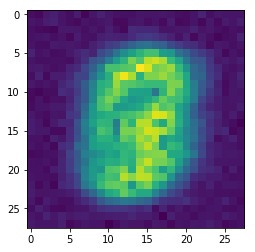

tensor(0.0647, grad_fn=<MseLossBackward>)


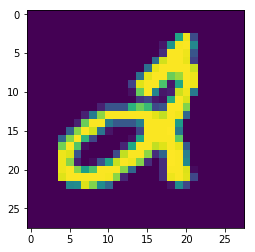

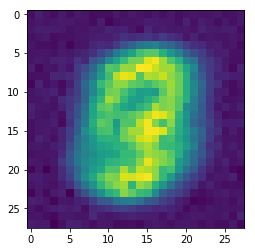

tensor(0.0633, grad_fn=<MseLossBackward>)


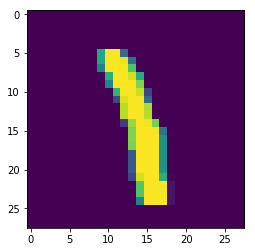

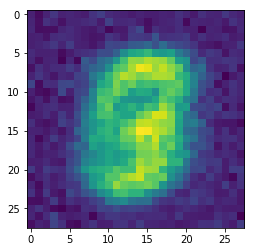

tensor(0.0641, grad_fn=<MseLossBackward>)


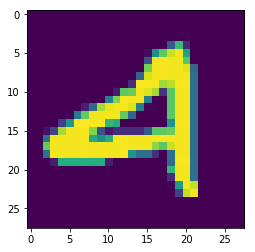

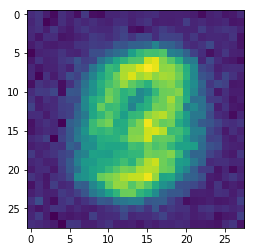

tensor(0.0666, grad_fn=<MseLossBackward>)


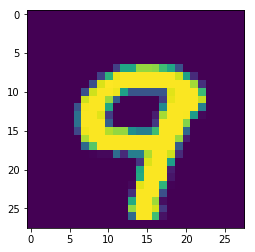

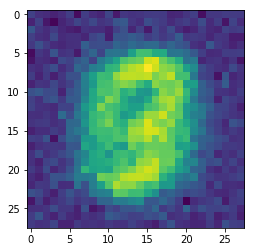

tensor(0.0649, grad_fn=<MseLossBackward>)


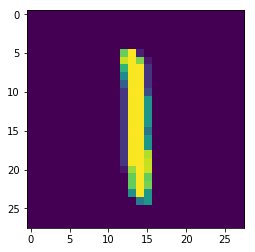

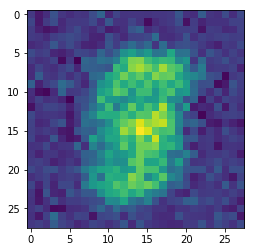

tensor(0.0582, grad_fn=<MseLossBackward>)


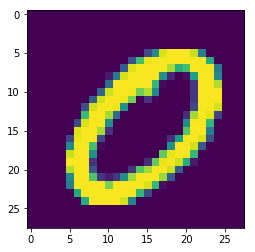

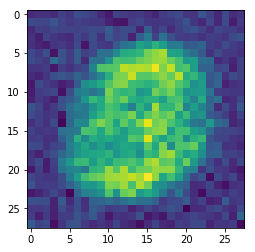

tensor(0.0625, grad_fn=<MseLossBackward>)


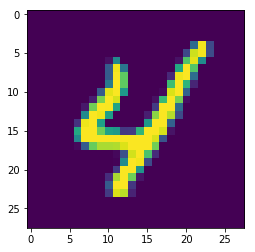

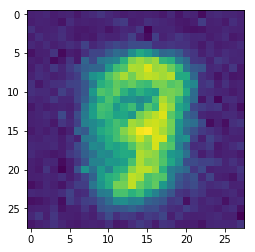

tensor(0.0597, grad_fn=<MseLossBackward>)


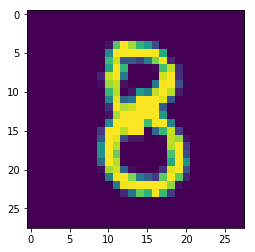

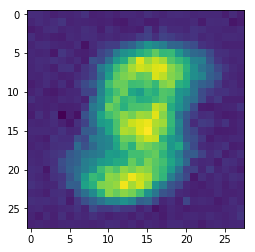

tensor(0.0575, grad_fn=<MseLossBackward>)


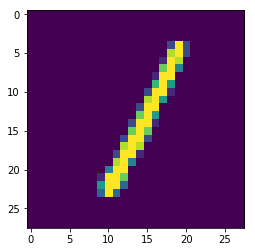

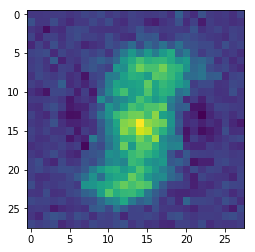

tensor(0.0560, grad_fn=<MseLossBackward>)


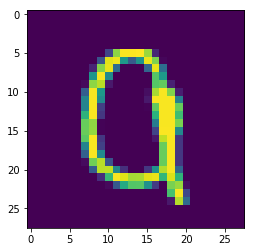

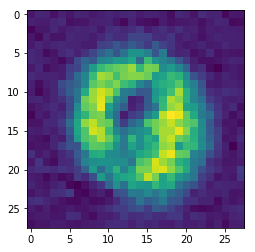

tensor(0.0561, grad_fn=<MseLossBackward>)


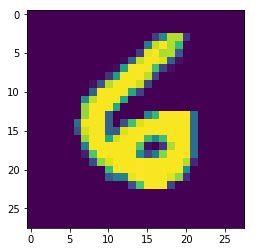

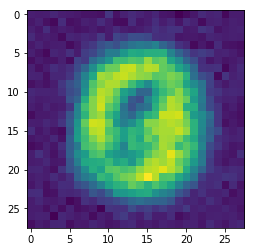

tensor(0.0575, grad_fn=<MseLossBackward>)


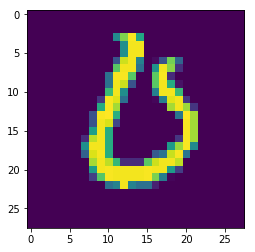

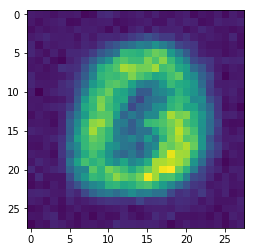

tensor(0.0557, grad_fn=<MseLossBackward>)


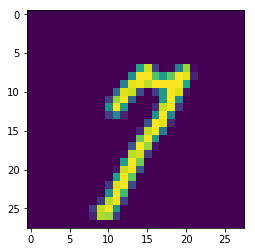

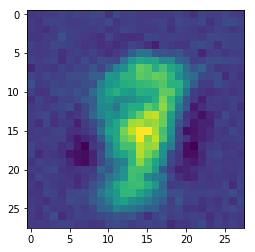

tensor(0.0535, grad_fn=<MseLossBackward>)


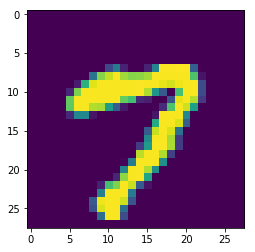

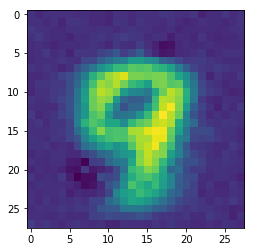

tensor(0.0531, grad_fn=<MseLossBackward>)


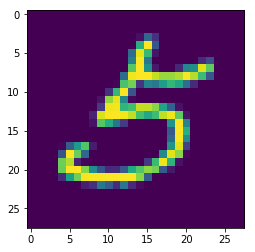

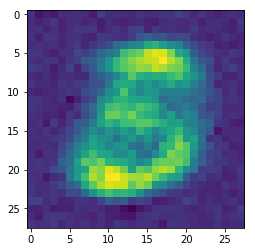

tensor(0.0531, grad_fn=<MseLossBackward>)


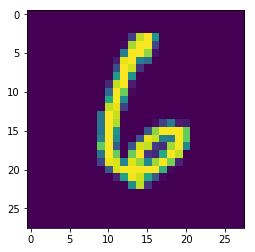

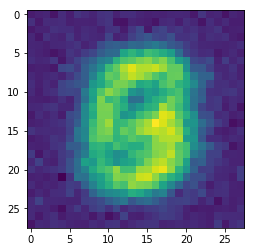

tensor(0.0519, grad_fn=<MseLossBackward>)


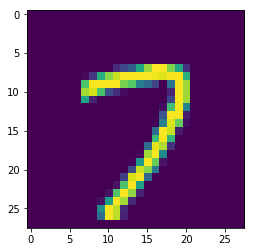

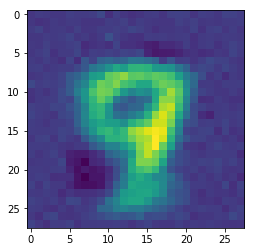

tensor(0.0539, grad_fn=<MseLossBackward>)


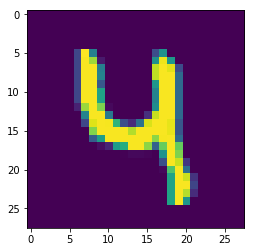

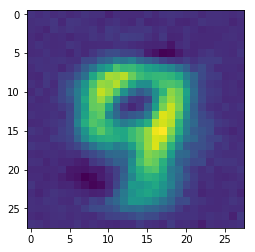

tensor(0.0523, grad_fn=<MseLossBackward>)


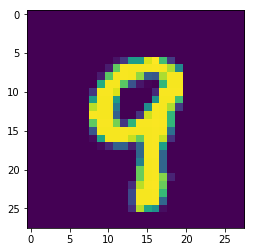

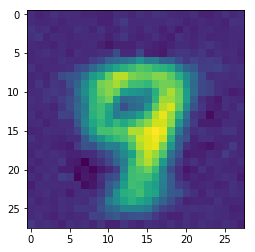

tensor(0.0518, grad_fn=<MseLossBackward>)


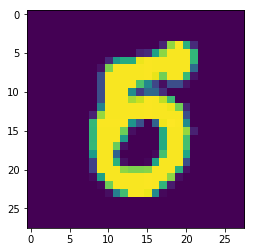

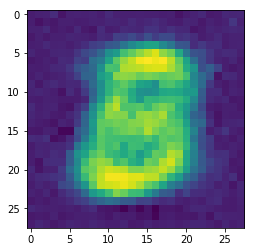

tensor(0.0495, grad_fn=<MseLossBackward>)


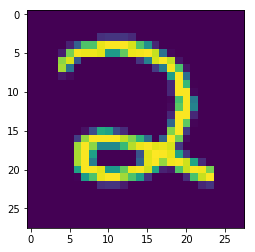

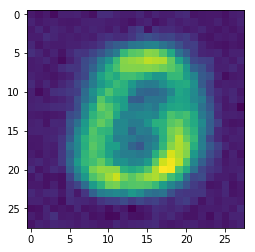

tensor(0.0519, grad_fn=<MseLossBackward>)


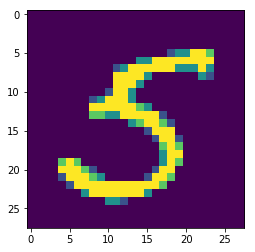

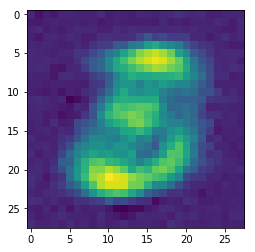

tensor(0.0551, grad_fn=<MseLossBackward>)


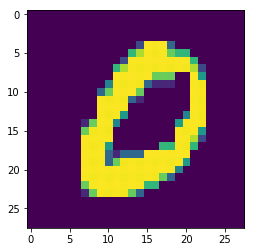

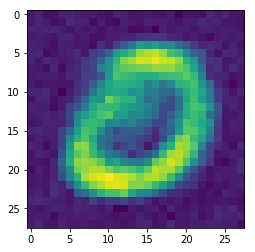

tensor(0.0486, grad_fn=<MseLossBackward>)


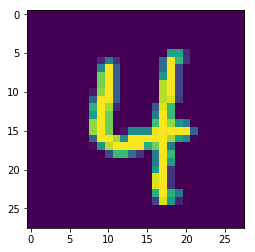

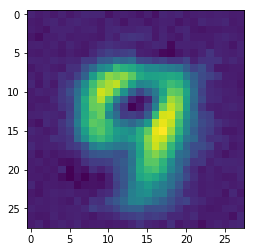

tensor(0.0477, grad_fn=<MseLossBackward>)


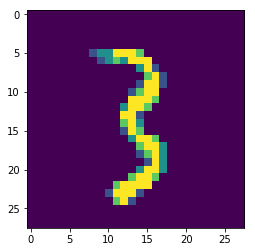

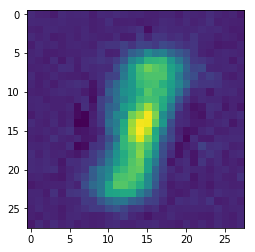

tensor(0.0500, grad_fn=<MseLossBackward>)


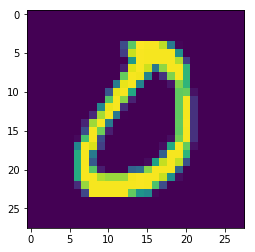

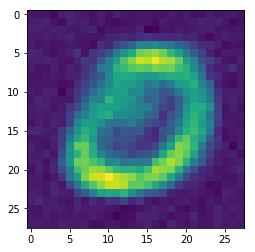

tensor(0.0505, grad_fn=<MseLossBackward>)


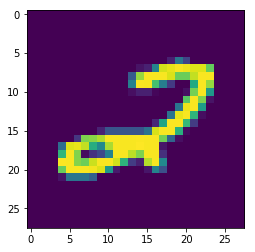

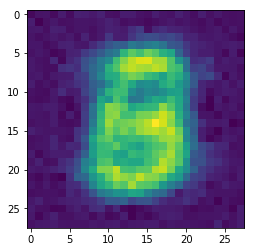

tensor(0.0481, grad_fn=<MseLossBackward>)


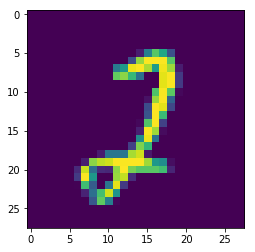

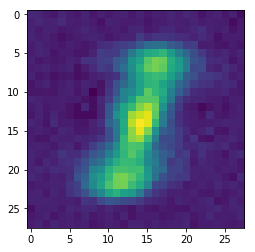

tensor(0.0512, grad_fn=<MseLossBackward>)


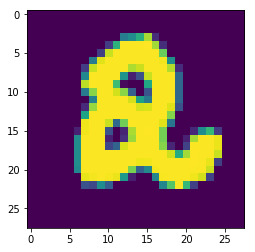

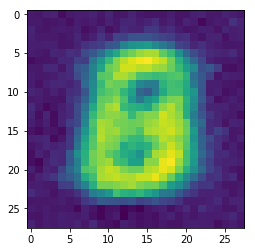

tensor(0.0526, grad_fn=<MseLossBackward>)


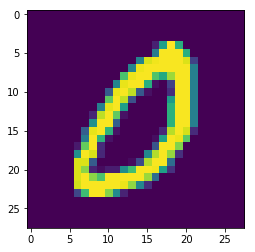

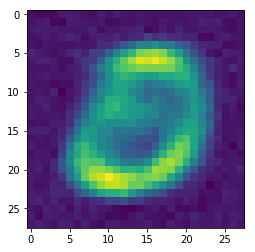

tensor(0.0499, grad_fn=<MseLossBackward>)


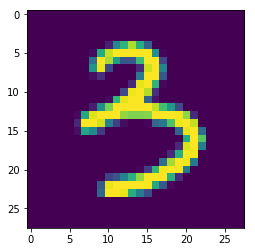

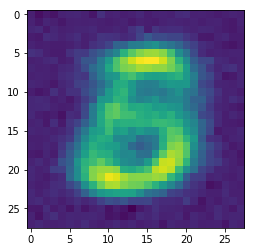

tensor(0.0504, grad_fn=<MseLossBackward>)


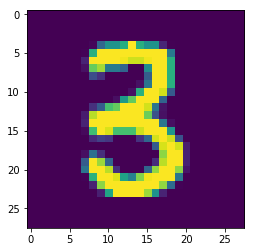

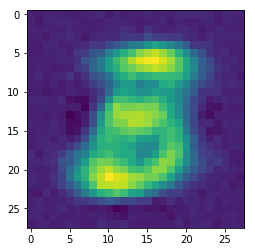

tensor(0.0510, grad_fn=<MseLossBackward>)


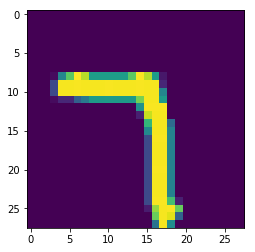

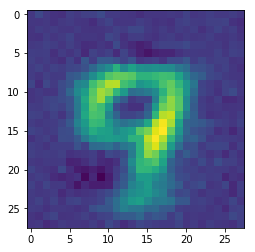

tensor(0.0502, grad_fn=<MseLossBackward>)


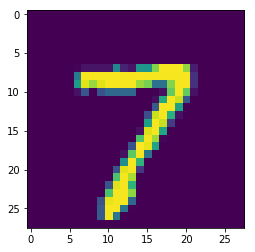

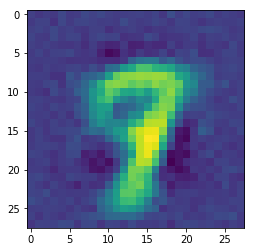

tensor(0.0505, grad_fn=<MseLossBackward>)


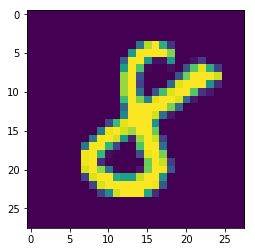

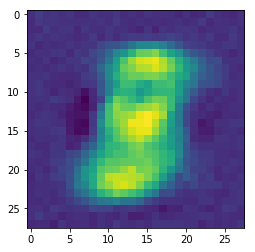

tensor(0.0479, grad_fn=<MseLossBackward>)


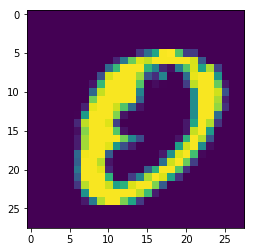

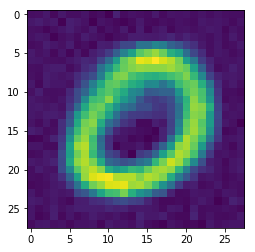

tensor(0.0532, grad_fn=<MseLossBackward>)


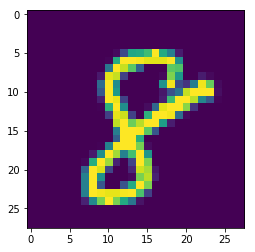

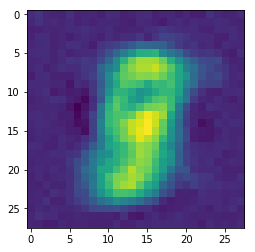

tensor(0.0490, grad_fn=<MseLossBackward>)


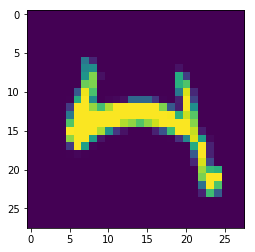

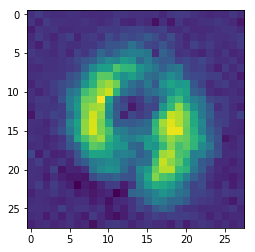

tensor(0.0529, grad_fn=<MseLossBackward>)


In [3]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

for batch_idx, (data_, _) in enumerate(train_loader):
    data= data_.to(device)
    optimizer.zero_grad()
    
    output = model(data)
    output = output.view(data.shape)
    
    
    loss = nn.MSELoss()(output, data)
    
    loss.backward()
    optimizer.step()
    
    if batch_idx % 20 == 0:
        plt.imshow(data[0].cpu().detach().numpy().squeeze())
        plt.show()
        plt.imshow(output[0].cpu().detach().numpy().squeeze())
        plt.show()
        print(loss)